# 1.인트로

### 피처 설명

- id 고유 id
- hour 시간
- temperature 기온
- precipitation 비가 오지 않았으면 0, 비가 오면 1
- windspeed 풍속(평균)
- humidity 습도
- visibility 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
- ozone 오존
- pm10 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
- pm2.5 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
- count 시간에 따른 따릉이 대여 수

## 1.1 문제 유형 및 데이터 정리

## 1.2 패키지 로드

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets        import load_iris, load_breast_cancer
#데이터 분류 함수
from sklearn.model_selection import train_test_split
from sklearn.metrics         import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, make_scorer, precision_recall_curve
#분류 알고리즘
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier
from sklearn.linear_model    import LogisticRegression, LinearRegression
from sklearn.impute          import SimpleImputer
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing   import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

import seaborn as sns
from io import StringIO
import missingno as msno
import matplotlib.pyplot as plt

In [ ]:
# matplot 한글 깨지는 부분을 해결하기 위해 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,564 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

## 1.3 데이터 로드

In [ ]:
# 데이터 불러오기
train = pd.read_csv('train.csv')# 모델 학습 파일
test = pd.read_csv('test.csv')# 모델 시험지 파일
submission = pd.read_csv('submission.csv')#답안지 파일

display(train)
display(test)
display(submission)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0
...,...,...,...,...,...,...,...,...,...,...
710,2148,1,24.6,0.0,2.4,60.0,1745.0,NaN,NaN,NaN
711,2149,1,18.1,0.0,1.0,55.0,2000.0,NaN,NaN,NaN
712,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020,17.0,15.0
713,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032,40.0,26.0


,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN
...,...,...
710,2148,NaN
711,2149,NaN
712,2165,NaN
713,2166,NaN


In [ ]:
print(train.info())
print()
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Cou

### 1.3.1 시각화

Text(18, 120, 'leave work')

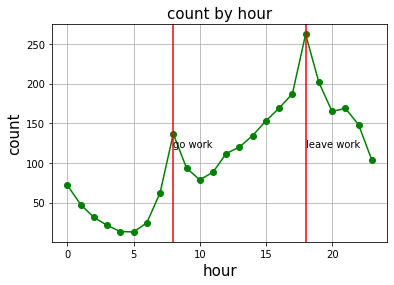

In [ ]:
import matplotlib.pyplot as plt  

plt.plot(train.groupby('hour').mean()['count'], 'go-') # plt.plot(데이터, '스타일 설정')
plt.grid() #보조선

plt.title("count by hour", fontsize =15)
plt.xlabel("hour", fontsize=15) 
plt.ylabel('count', fontsize=15)

plt.axvline(8, color = 'r')                  # 보조선
plt.axvline(18, color = 'r')
  
plt.text(8,120, 'go work', fontsize=10)      # 텍스트 추가
plt.text(18,120, 'leave work', fontsize=10)
# [출처] [파이썬] 데이콘 : 서울시 따릉이 자전거 이용 예측 AI 모델 (EDA)|작성자 태태



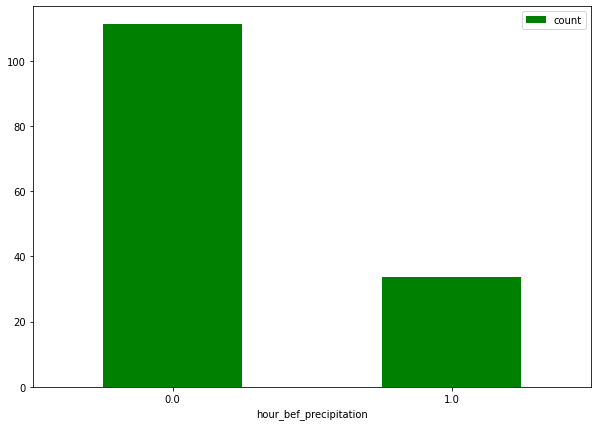

In [ ]:
train[['hour_bef_precipitation', 'count']].groupby('hour_bef_precipitation').mean().plot(kind = "bar", rot = 0, color='g', figsize=(10, 7))

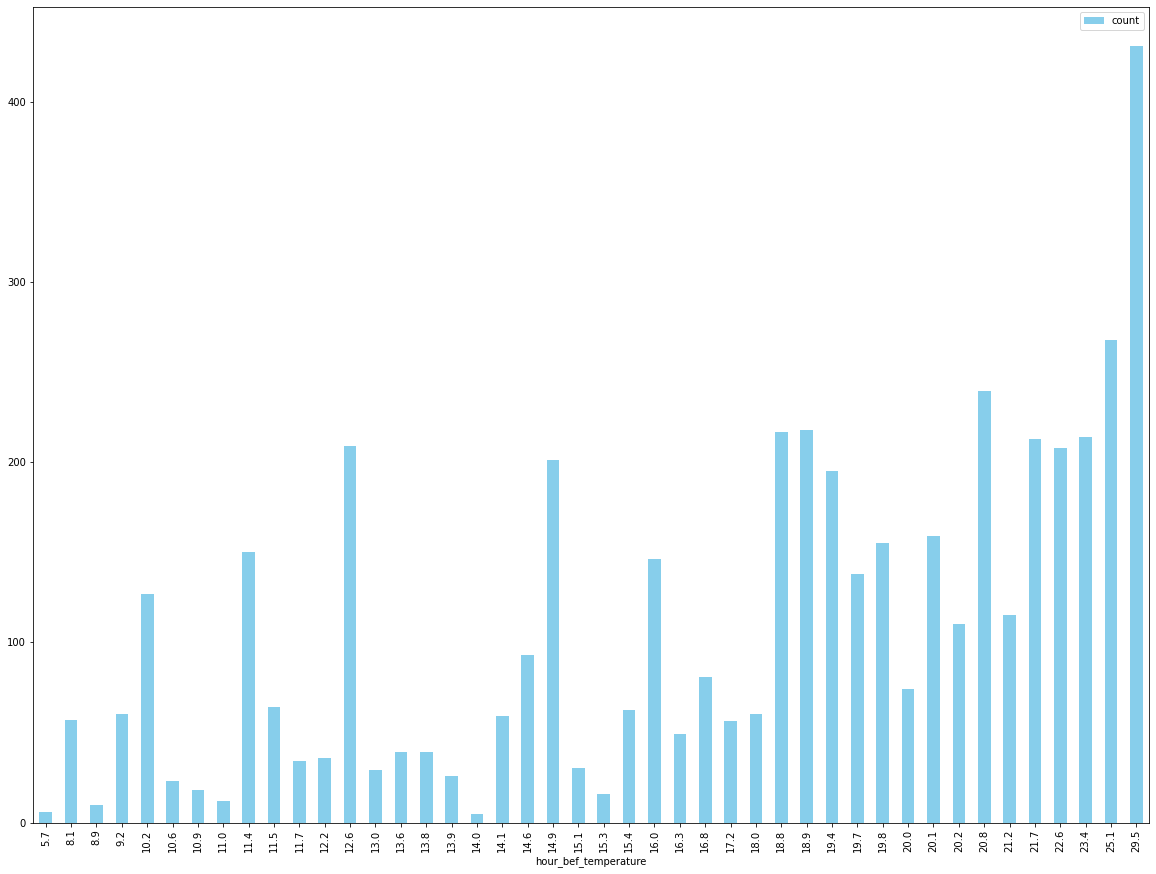

In [ ]:
train[['hour_bef_temperature', 'count']].head(50).groupby('hour_bef_temperature').mean().plot(kind = "bar", rot = 90, color='SKYBLUE', figsize=(20, 15))

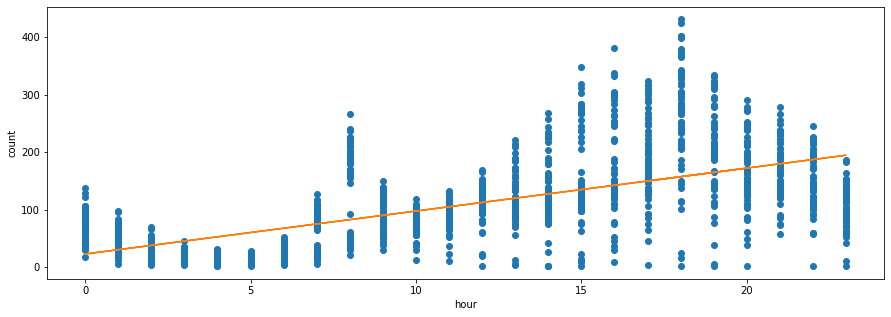

In [ ]:
X = train[['hour']]
Y = train[['count']]

linear_model = LinearRegression()
linear_model.fit(X, Y)
y_pred = linear_model.predict(X)
y_pred

plt.figure(figsize=(15,5))
plt.plot(X, Y, 'o')
plt.plot(X, y_pred)
plt.xlabel('hour')
plt.ylabel('count')
plt.show()
plt.close()

# 2.전처리

### 2.1 이상치 처리

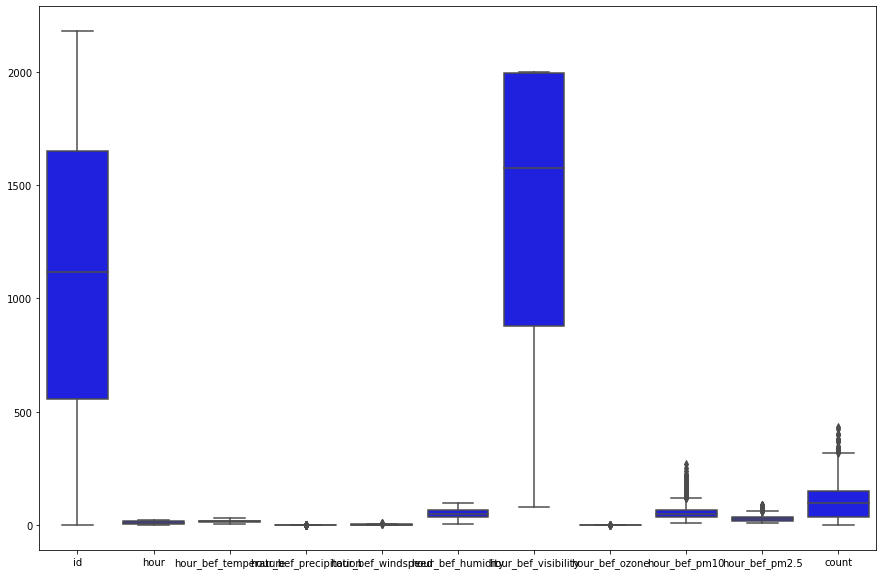

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.boxplot(data=train, color='b')
plt.show()

In [ ]:
# 함수 정의
def removeQutlier(frm, column):
    q1 = frm[column].quantile(0.25)   #이 값을 1사분위 값으로 지정
    q3 = frm[column].quantile(0.75)   #이 값을 3사분위 값으로 지정
    print(q1, q3) 
    
    tmp_frm = frm
    #IOR - 1사분위 ~ 3사분위
    iqr = 1.5*(q3-q1)
    print("iqr:", iqr)
    tmp_frm[column][ (tmp_frm[column] > (q3 + iqr)) | (tmp_frm[column] < (q3 - iqr))] = None
    #위 값은 결측치
    
    return tmp_frm

1.4 3.4
iqr: 3.0
0.025500000000000002 0.052
iqr: 0.039749999999999994
20.0 37.0
iqr: 25.5
36.0 69.0
iqr: 49.5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


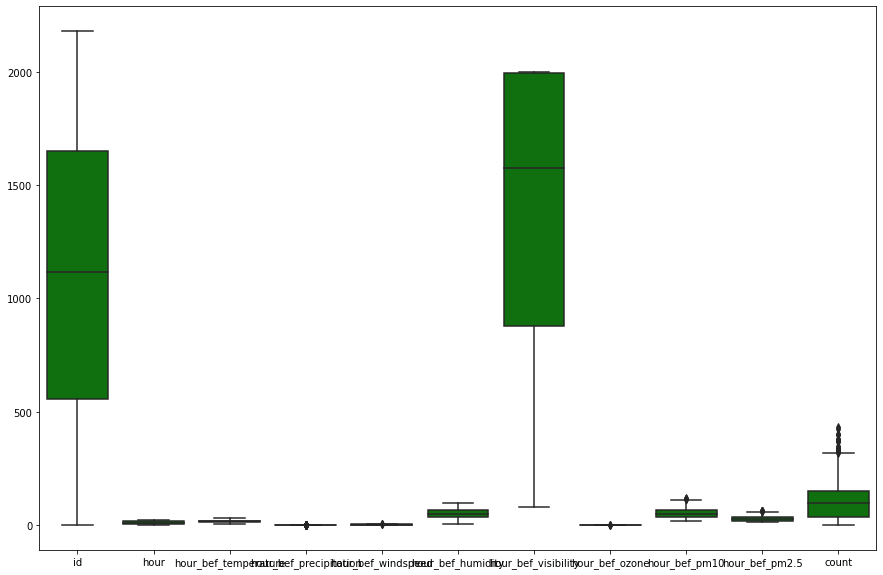

In [ ]:
# 함수 적용
train_after = train.copy()  # 원본 보호
test_after = test.copy()  # 결측치 및 이상치 평균처리

missing_frm = removeQutlier(train_after, 'hour_bef_windspeed')
missing_frm = removeQutlier(train_after, 'hour_bef_ozone')
missing_frm = removeQutlier(train_after, 'hour_bef_pm2.5')
missing_frm = removeQutlier(train_after, 'hour_bef_pm10')

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.boxplot(data=missing_frm, color='green')
plt.show()

AxesSubplot(0.125,0.125;0.698618x0.755)


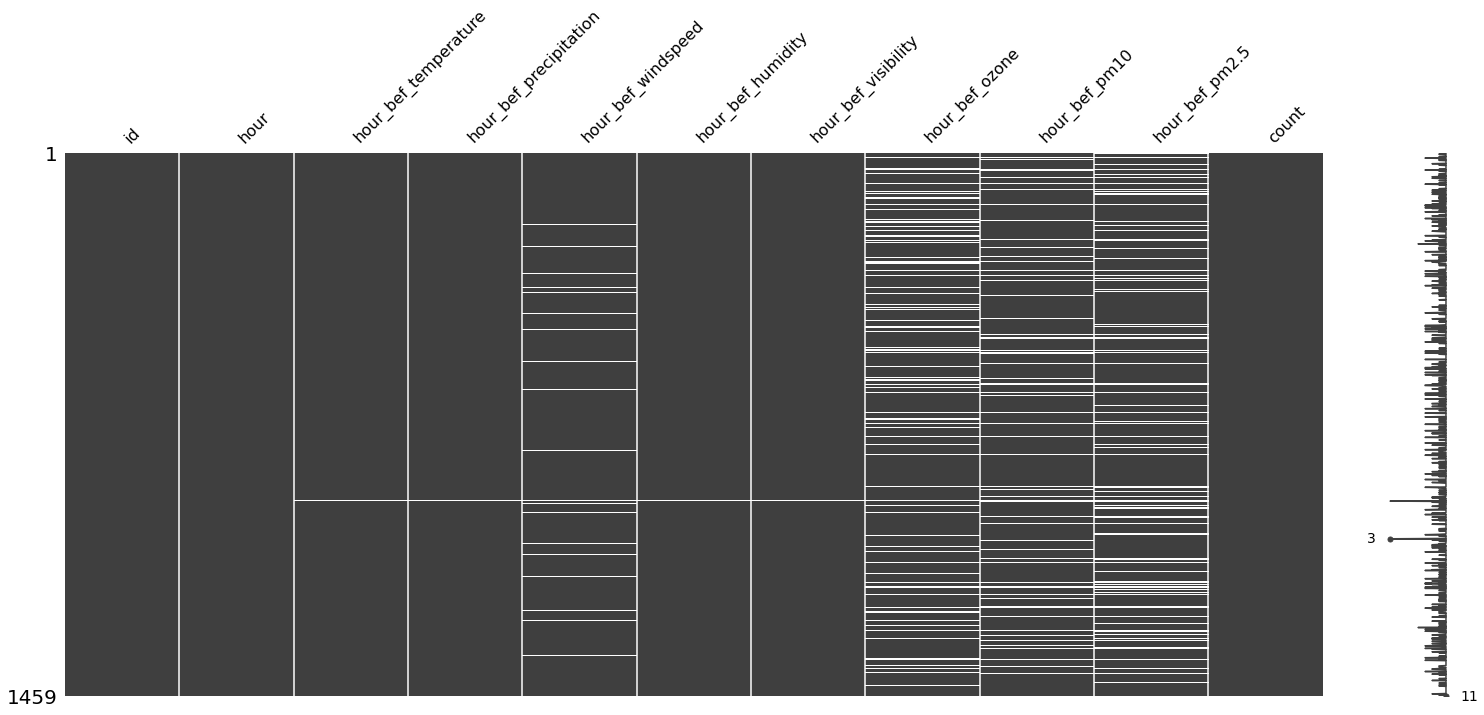

In [ ]:
print(msno.matrix(train_after))

### 2.2 결측치 처리

In [ ]:
train.columns

# 컬럼명 변경
train_han = train_after.copy()
test_han = test_after.copy()

train_han.columns = ['고유id', '시간', '기온', '강수여부', '풍속(평균)', '습도', '시정&시계', '오존', '미세먼지', '초미세먼지', '대여수']
test_han.columns = ['고유id', '시간', '기온', '강수여부', '풍속(평균)', '습도', '시정&시계', '오존', '미세먼지', '초미세먼지']
display(train_han)
display(test_han)

,고유id,시간,기온,강수여부,풍속(평균),습도,시정&시계,오존,미세먼지,초미세먼지,대여수
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,NaN,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,NaN,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,NaN,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


,고유id,시간,기온,강수여부,풍속(평균),습도,시정&시계,오존,미세먼지,초미세먼지
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0
...,...,...,...,...,...,...,...,...,...,...
710,2148,1,24.6,0.0,2.4,60.0,1745.0,NaN,NaN,NaN
711,2149,1,18.1,0.0,1.0,55.0,2000.0,NaN,NaN,NaN
712,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020,17.0,15.0
713,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032,40.0,26.0


In [ ]:
# 학습 데이터 결측치 갯수
print("학습 데이터 NaN 갯수: \n", train_han.isna().sum())
# 테스트 데이터 결측치 갯수
print()
print("테스트 데이터 NaN 갯수: \n", test_han.isna().sum())

학습 데이터 NaN 갯수: 
 고유id        0
시간          0
기온          2
강수여부        2
풍속(평균)     62
습도          2
시정&시계       2
오존        215
미세먼지      172
초미세먼지     210
대여수         0
dtype: int64

테스트 데이터 NaN 갯수: 
 고유id       0
시간         0
기온         1
강수여부       1
풍속(평균)     1
습도         1
시정&시계      1
오존        35
미세먼지      37
초미세먼지     36
dtype: int64


In [ ]:
# def fillna_data(dataframe, column):
# NaN 평균 처리
train_after.fillna(train_after.mean(), inplace=True)
test_after.fillna(test_after.mean(), inplace=True)

print("학습 데이터 NaN 갯수: \n", train_after.isna().sum())

학습 데이터 NaN 갯수: 
 id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64


AxesSubplot(0.125,0.125;0.698618x0.755)


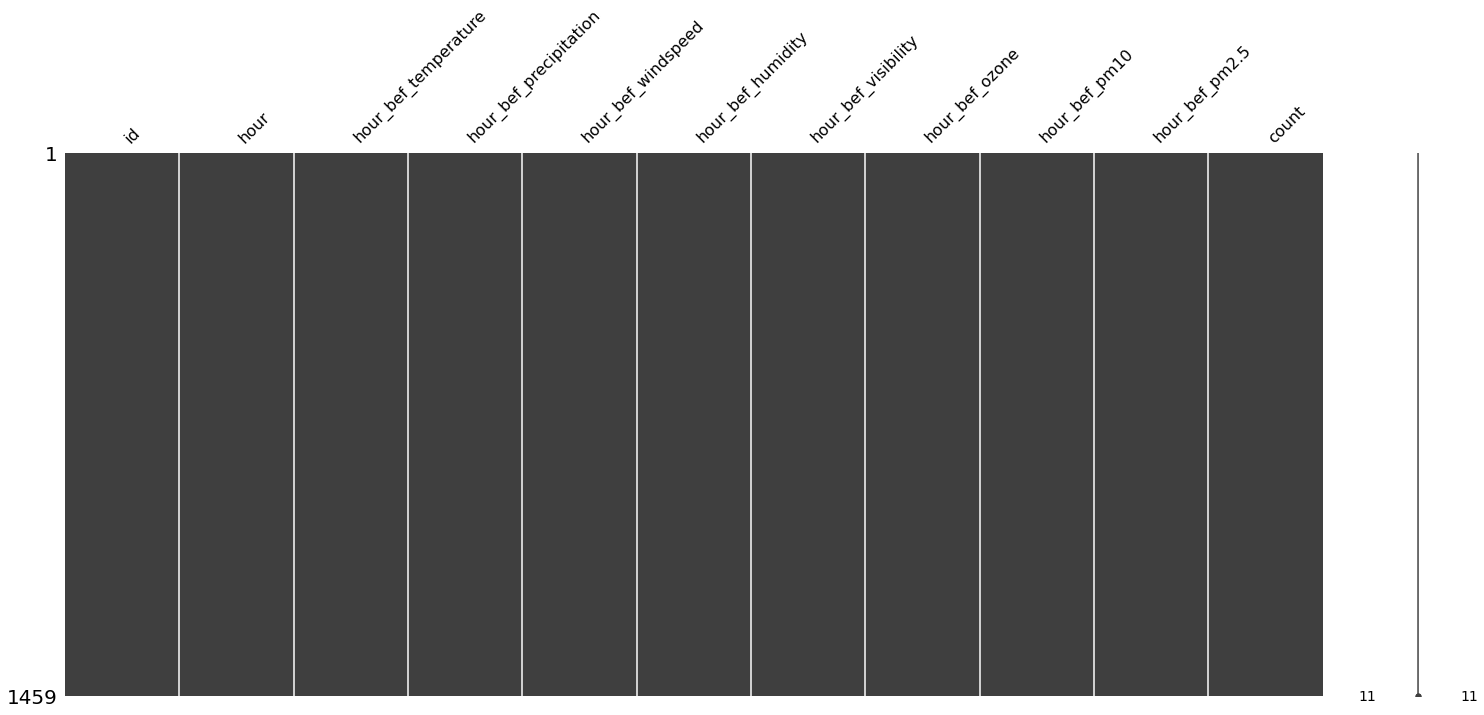

In [ ]:
''' id 고유 id
    hour 시간
    temperature 기온
    precipitation 비가 오지 않았으면 0, 비가 오면 1
    windspeed 풍속(평균)
    humidity 습도
    visibility 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
    ozone 오존
    pm10 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
    pm2.5 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
    count 시간에 따른 따릉이 대여 수'''
print(msno.matrix(train_after))

In [ ]:
# plt.figure(figsize=(12,9)) # 사이즈 변경
# plt.xticks(rotation = 90) # x축 text 회전
# sns.barplot(x = abs(train.corr()["count"]).sort_values(ascending = False)[1:].index ,
#             y = abs(train.corr()["count"]).sort_values(ascending = False)[1:]) # target을 제외하고 나머지와의 상관관계 시각화

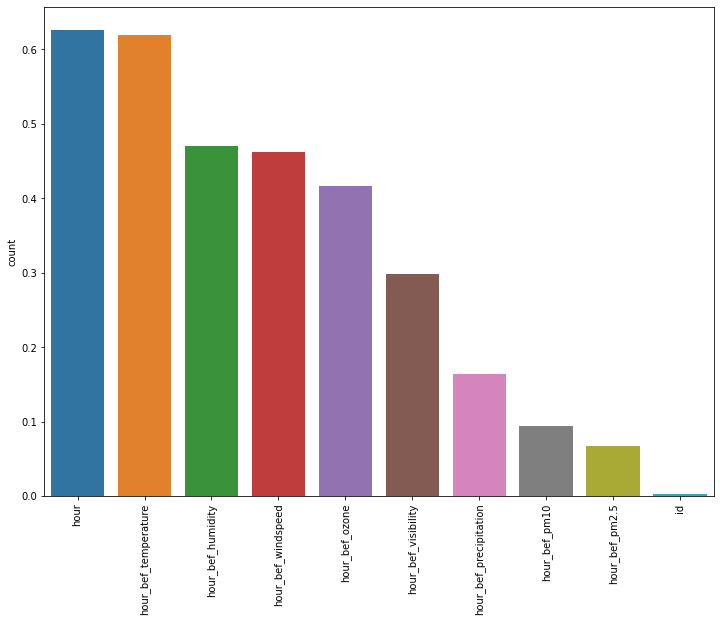

In [ ]:
plt.figure(figsize=(12,9)) # 사이즈 변경
plt.xticks(rotation = 90) # x축 text 회전
sns.barplot(x = abs(train_after.corr()["count"]).sort_values(ascending = False)[1:].index ,
            y = abs(train_after.corr()["count"]).sort_values(ascending = False)[1:]) # target을 제외하고 나머지와의 상관관계 시각화

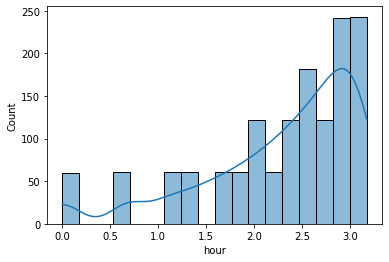

In [ ]:
sns.histplot(np.log1p(train_after["hour"]), kde=True)
plt.show()

# 3.학습 & 예측

## 3.1데이터 분할

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.model_selection import train_test_split

# 데이터 나누기
X = train_after.drop(['id', 'count'], axis=1)
Y = train_after[['count']]
Z = test_after.drop(['id'], axis=1)

display(X)
display(Y)
display(Z)

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,20,16.3,1.0,1.5,89.0,576.0,0.027000,76.0,33.000000
1,13,20.1,0.0,1.4,48.0,916.0,0.042000,73.0,40.000000
2,6,13.9,0.0,0.7,79.0,1382.0,0.033000,32.0,19.000000
3,23,8.1,0.0,2.7,54.0,946.0,0.040000,75.0,28.746197
4,18,29.5,0.0,4.8,7.0,2000.0,0.057000,27.0,28.746197
...,...,...,...,...,...,...,...,...,...
1454,4,16.8,0.0,1.6,53.0,2000.0,0.031000,37.0,27.000000
1455,3,10.8,0.0,3.8,45.0,2000.0,0.039000,34.0,19.000000
1456,5,18.3,0.0,1.9,54.0,2000.0,0.041724,30.0,21.000000
1457,21,20.7,0.0,3.7,37.0,1395.0,0.082000,71.0,36.000000


,count
0,49.0
1,159.0
2,26.0
3,57.0
4,431.0
...,...
1454,21.0
1455,20.0
1456,22.0
1457,216.0


,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,7,20.7,0.0,1.3,62.0,954.0,0.041000,44.000000,27.000000
1,17,30.0,0.0,5.4,33.0,1590.0,0.061000,49.000000,36.000000
2,13,19.0,1.0,2.1,95.0,193.0,0.020000,36.000000,28.000000
3,6,22.5,0.0,2.5,60.0,1185.0,0.027000,52.000000,38.000000
4,22,14.6,1.0,3.4,93.0,218.0,0.041000,18.000000,15.000000
...,...,...,...,...,...,...,...,...,...
710,1,24.6,0.0,2.4,60.0,1745.0,0.041196,36.930678,24.939617
711,1,18.1,0.0,1.0,55.0,2000.0,0.041196,36.930678,24.939617
712,9,23.3,0.0,2.3,66.0,1789.0,0.020000,17.000000,15.000000
713,16,27.0,0.0,1.6,46.0,1956.0,0.032000,40.000000,26.000000


## 3.2 모델 선정

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                   test_size=0.3,
                                                   random_state=1)

models = [
    ('lr', lm.LinearRegression(n_jobs=-1)),
    ('ridge', lm.Ridge()),
    ('lasso', lm.Lasso()),
    ('elastic', lm.ElasticNet()),
    ('LassoLars', lm.LassoLars()),
    ('LogisticRegression', lm.LogisticRegression()),
    ('SGDRegressor', lm.SGDRegressor()),
    ('Perceptron', lm.Perceptron(n_jobs=-1)),
    ('xgboost', xgb.XGBRegressor())
]
n = 3
params = {
    'lr' : {
        'fit_intercept': [True, False],
        'normalize': [True, False],
    },
    'ridge': {
        'alpha': [0.01, 0.1, 1.0, 10, 100],
        'fit_intercept': [True, False],
        'normalize': [True, False],
    },
    'lasso': {
        'alpha': [0.1, 1.0, 10],
        'fit_intercept': [True, False],
        'normalize': [True, False],
    },
    'elastic': {
        'alpha': [0.1, 1.0, 10],
        'normalize': [True, False],
        'fit_intercept': [True, False],
    },
    'LassoLars': {
        'alpha': [0.1, 1.0, 10],
        'normalize': [True, False],
        'fit_intercept': [True, False],
    },
    'LogisticRegression': {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1.0, 10, 100],
        'fit_intercept': [True, False],
    },
    'SGDRegressor': {
        'penalty': ['l1', 'l2'],
        'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100],
        'fit_intercept': [True, False],
    },
    'Perceptron' :{
        'penalty': ['None', 'l1', 'l2'],
        'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100],
        'fit_intercept': [True, False]
    },
    'xgboost': {
        "gamma": uniform(0, 0.5).rvs(n),
        "max_depth": range(2, 7), # default 3
        "n_estimators": randint(100, 150).rvs(n), # default 100
    }
}

best_model, best_mae = None, float('inf')
for model_name, model in models:
    param_grid = params[model_name]
    grid = GridSearchCV(model, cv=5, n_jobs=-1, param_grid=param_grid)
    grid = grid.fit(X_train, Y_train)

    model = grid.best_estimator_
    predictions = model.predict(X_test)
    mae = mean_absolute_error(Y_test, predictions)

    print(model_name, mae)

    if mae < best_mae:
        best_model = model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


lr 39.3644168315055


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


ridge 39.36033108189522


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


lasso 39.47418510858964


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


elastic 39.58676863746727
LassoLars 39.47418428633269


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(s

LogisticRegression 59.78310502283105


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


SGDRegressor 415704240637666.06


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron 101.67351598173516
[11:02:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgboost 25.508094413639746


In [ ]:
best_model

XGBRegressor(gamma=0.23932631846285146, max_depth=5, n_estimators=127)

#### 결과

- lr 39.21
- ridge 39.01
- lasso 39.28
- elastic 39.60
- LassoLars 39.28
- LogisticRegression 55.01
- SGDRegressor 491929299018893.56
- Perceptron 101.67
- xgboost 25.83

#### xgboost의 장점
 

1. GBM(gradient boostin algorithm) 대비 빠른 수행시간 : 병렬 처리로 학습, 분류 속도가 빠르다.

 

2. 과적합 규제(Regularization) : 표준 GBM 경우 과적합 규제기능이 없으나, XGBoost는 자체에 과적합 규제 기능으로 강한 내구성 지닌다.

 

3. 분류와 회귀영역에서 뛰어난 예측 성능 발휘 :  즉, CART(Classification and regression tree) 앙상블 모델을 사용

 

4. Early Stopping(조기 종료) 기능 : 다양한 옵션을 제공하며 Customizing이 용이하다.

In [ ]:
!pip install cmake
!pip install xgboost

## 3.3 LinearRegression

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                   test_size=0.3,
                                                   random_state=6)

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

#기울기 및 절편, 정확도 등 확인
print("w = 기울기 : " , linear_model.coef_)
print()
print('b = 절편   : ' , linear_model.intercept_)
print()
print('모델의 신뢰도 - ')
y_squared = linear_model.score(X_test, Y_test)
print(y_squared)

w = 기울기 :  [[ 4.75955490e+00  5.53367768e+00 -4.53819238e+01  4.83229518e+00
  -6.09766456e-02  1.22255606e-02  2.80153998e+02 -8.80049881e-02
   1.06419327e-02]]

b = 절편   :  [-69.73829059]

모델의 신뢰도 - 
0.6256520462380842


In [ ]:
print('예측 - ')
y_pred = linear_model.predict(Z)
print(y_pred)

예측 - 
[[100.19176488]
 [233.86553826]
 [ 61.34132148]
 [109.62850719]
 [ 93.86768849]
 [135.39351376]
 [160.16969054]
 [229.48638694]
 [ 77.43495595]
 [ 22.96028988]
 [225.41437543]
 [206.8493107 ]
 [173.57906898]
 [ 87.27313721]
 [198.69893537]
 [201.86663358]
 [ 64.12562893]
 [142.69743453]
 [224.97226115]
 [176.49802105]
 [228.19537658]
 [ 73.0791151 ]
 [ 93.05029155]
 [169.97449754]
 [189.14111948]
 [157.76735853]
 [ 63.04158272]
 [137.9597781 ]
 [128.40083605]
 [195.26098495]
 [ 60.89704272]
 [ 96.24752442]
 [102.6233901 ]
 [188.92430351]
 [208.10986282]
 [ 94.47401855]
 [182.63026361]
 [104.00560745]
 [243.62536048]
 [ 78.76550979]
 [ 18.34036017]
 [163.19975312]
 [ 87.61476563]
 [ 78.47184471]
 [234.1219273 ]
 [185.70616293]
 [ 48.17272366]
 [ 86.61704853]
 [ 76.18362903]
 [ 76.65420271]
 [224.68042552]
 [100.12333211]
 [ 79.61079962]
 [115.35715287]
 [200.99371187]
 [ 90.20370843]
 [ 87.1931832 ]
 [180.48944901]
 [100.90193598]
 [ 78.72730425]
 [ 96.12107066]
 [ 99.069769  ]
 [

In [ ]:
for i in y_pred:
    if i < 0:
        print(i)

[-10.85183229]
[-12.10724796]
[-2.66602843]


In [ ]:
result_2 = submission.copy()
result_2['count'] =  y_pred
result_2.to_csv('result_2.csv', index = False)
result_2

,id,count
0,0,100.191765
1,1,233.865538
2,2,61.341321
3,4,109.628507
4,5,93.867688
...,...,...
710,2148,108.978679
711,2149,69.666962
712,2165,135.260366
713,2166,190.385247


## 3.3.1 XGBRegressor

In [ ]:
best_model

XGBRegressor(gamma=0.23932631846285146, max_depth=5, n_estimators=127)

In [ ]:
X.columns

Index(['hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54588 missing from current font.
  font.set_

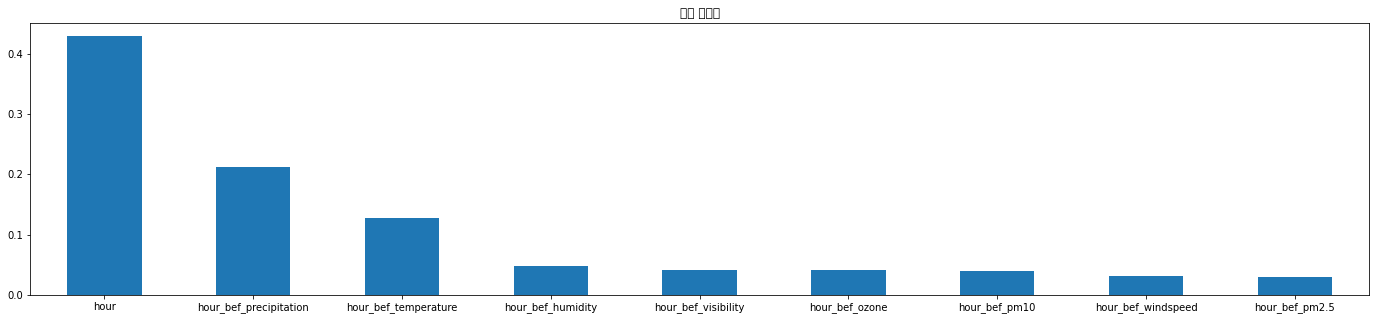

In [ ]:
features = ['hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5']

feature_importance = pd.Series(index=features, data=best_model.feature_importances_).sort_values(ascending=False)
feature_importance.plot(kind='bar', figsize=(24, 5), title="피쳐 중요도", rot=0)
plt.show()

In [ ]:
X[features]

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,20,16.3,1.0,1.5,89.0,576.0,0.027000,76.0,33.000000
1,13,20.1,0.0,1.4,48.0,916.0,0.042000,73.0,40.000000
2,6,13.9,0.0,0.7,79.0,1382.0,0.033000,32.0,19.000000
3,23,8.1,0.0,2.7,54.0,946.0,0.040000,75.0,28.746197
4,18,29.5,0.0,4.8,7.0,2000.0,0.057000,27.0,28.746197
...,...,...,...,...,...,...,...,...,...
1454,4,16.8,0.0,1.6,53.0,2000.0,0.031000,37.0,27.000000
1455,3,10.8,0.0,3.8,45.0,2000.0,0.039000,34.0,19.000000
1456,5,18.3,0.0,1.9,54.0,2000.0,0.041724,30.0,21.000000
1457,21,20.7,0.0,3.7,37.0,1395.0,0.082000,71.0,36.000000


In [ ]:
features = ['hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5']

X_train, X_test, y_train, y_test = train_test_split(X[features],
                                                    Y['count'],
                                                    test_size=0.3,
                                                    random_state=7)

param_grid = {
    "gamma": uniform(0, 0.5).rvs(n),
    "max_depth": range(2, 7), # default 3
    "n_estimators": randint(100, 150).rvs(n), # default 100
}

grid = GridSearchCV(xgb.XGBRegressor(), cv=5, n_jobs=-1, param_grid=param_grid)
grid = grid.fit(X_train, y_train)

model = grid.best_estimator_
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)

print("MAE", mae)

[11:03:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE 26.9157151228761


In [ ]:
print('모델의 신뢰도 - ')
y_squared = model.score(X_test, y_test)
print(y_squared)

모델의 신뢰도 - 
0.7610472236545964


In [ ]:
Y_prediction = linear_model.predict(X_test).flatten()
# print(Y_prediction[0])
# print(Y_test.values[0][0])
for i in range(20):
    label = Y_test.values[i][0]
    # label = np.exp(label)
    prediction = Y_prediction[i]
    prediction = prediction
    print("실제 값: {:.3f}, \t 예측 값: {:.3f}".format(label, prediction))

실제 값: 120.000, 	 예측 값: 79.378
실제 값: 272.000, 	 예측 값: 126.603
실제 값: 15.000, 	 예측 값: 28.896
실제 값: 218.000, 	 예측 값: 155.731
실제 값: 12.000, 	 예측 값: 95.812
실제 값: 118.000, 	 예측 값: 204.714
실제 값: 7.000, 	 예측 값: 63.710
실제 값: 26.000, 	 예측 값: 116.350
실제 값: 22.000, 	 예측 값: 38.631
실제 값: 125.000, 	 예측 값: 137.792
실제 값: 30.000, 	 예측 값: 100.852
실제 값: 34.000, 	 예측 값: 80.220
실제 값: 56.000, 	 예측 값: 55.216
실제 값: 63.000, 	 예측 값: 151.931
실제 값: 73.000, 	 예측 값: 155.909
실제 값: 19.000, 	 예측 값: 165.357
실제 값: 190.000, 	 예측 값: 200.989
실제 값: 55.000, 	 예측 값: 132.306
실제 값: 65.000, 	 예측 값: 127.459
실제 값: 75.000, 	 예측 값: 204.790


In [ ]:
print('예측 - ')
y_pred = linear_model.predict(Z)
print(y_pred)

예측 - 
[[100.19176488]
 [233.86553826]
 [ 61.34132148]
 [109.62850719]
 [ 93.86768849]
 [135.39351376]
 [160.16969054]
 [229.48638694]
 [ 77.43495595]
 [ 22.96028988]
 [225.41437543]
 [206.8493107 ]
 [173.57906898]
 [ 87.27313721]
 [198.69893537]
 [201.86663358]
 [ 64.12562893]
 [142.69743453]
 [224.97226115]
 [176.49802105]
 [228.19537658]
 [ 73.0791151 ]
 [ 93.05029155]
 [169.97449754]
 [189.14111948]
 [157.76735853]
 [ 63.04158272]
 [137.9597781 ]
 [128.40083605]
 [195.26098495]
 [ 60.89704272]
 [ 96.24752442]
 [102.6233901 ]
 [188.92430351]
 [208.10986282]
 [ 94.47401855]
 [182.63026361]
 [104.00560745]
 [243.62536048]
 [ 78.76550979]
 [ 18.34036017]
 [163.19975312]
 [ 87.61476563]
 [ 78.47184471]
 [234.1219273 ]
 [185.70616293]
 [ 48.17272366]
 [ 86.61704853]
 [ 76.18362903]
 [ 76.65420271]
 [224.68042552]
 [100.12333211]
 [ 79.61079962]
 [115.35715287]
 [200.99371187]
 [ 90.20370843]
 [ 87.1931832 ]
 [180.48944901]
 [100.90193598]
 [ 78.72730425]
 [ 96.12107066]
 [ 99.069769  ]
 [

In [ ]:
y_pred_1 = []
for i in y_pred:
    if i < 0:
        i = 0
        # i = i.astype('ndarray')
        # i = np.array(i)
        i = [i]
    print(i[0])
    y_pred_1.append(i[0])
# print("반복 끝")
# print(y_pred_1)
# print(type(y_pred))

100.19176487728588
233.86553825937517
61.341321484517934
109.62850719039595
93.86768848777682
135.39351376028372
160.1696905407374
229.48638693827172
77.4349559501875
22.960289881718737
225.41437543194291
206.84931070487812
173.57906897898886
87.27313720580297
198.69893537255894
201.8666335773517
64.12562892879687
142.69743453325185
224.9722611487678
176.49802105312176
228.19537658227216
73.07911510139947
93.05029154779085
169.9744975408011
189.14111948441194
157.76735853073126
63.041582724356246
137.95977809606836
128.40083604665602
195.26098494617582
60.89704272294385
96.24752442455092
102.62339009710387
188.92430351006465
208.109862821617
94.47401855311035
182.6302636063565
104.00560745211568
243.62536048098502
78.76550978794005
18.34036017301395
163.1997531235325
87.6147656345487
78.471844713659
234.12192730156318
185.70616293252635
48.17272366365799
86.61704853213062
76.18362903195269
76.65420270679128
224.68042552015237
100.1233321093781
79.6107996165613
115.35715287490986
200.99

In [ ]:
result_1 = submission.copy()
result_1['count'] =  y_pred_1
result_1.to_csv('result_1.csv', index = False)
result_1

,id,count
0,0,100.191765
1,1,233.865538
2,2,61.341321
3,4,109.628507
4,5,93.867688
...,...,...
710,2148,108.978679
711,2149,69.666962
712,2165,135.260366
713,2166,190.385247


## 3.3.2 재시도

## 3.3.3 RandomForestRegressor

In [ ]:
# 랜덤 포레스트 모형 설정
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #랜덤 포레스트 불러오기

model100 = RandomForestRegressor(n_estimators=100, random_state=40)
model105 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=50) #나무 수, 과적합, 랜덤 고정
model250 = RandomForestRegressor(n_estimators=250)
model305 = RandomForestRegressor(n_estimators=300, max_depth=5, random_state=60) #나무 수, 과적합, 랜덤 고정

features = ['hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5']

X_train=train_after[features]
Y_train=train_after['count']
X_test=test_after[features]

# 모델 학습
model100.fit(X_train, Y_train)
model105.fit(X_train, Y_train)
model250.fit(X_train, Y_train)
model305.fit(X_train, Y_train)

# 모델 예측
ypred1 = model100.predict(X_test)
ypred2 = model105.predict(X_test)
ypred7 = model250.predict(X_test)
ypred8 = model305.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor #랜덤 포레스트 불러오기


features = ['hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5']

X = train_after[features]
Y = train_after['count']
Z = test_after[features]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   Y,
                                                   test_size = 0.3,
                                                   shuffle = True,
                                                   random_state = 200)

params = {
        'n_estimators' : [50, 100, 150, 200],
        'max_features' : [6, 8, 15, 20],
        'max_depth'    : [4, 6, 8]
}
rfc_model = RandomForestClassifier(
                            n_estimators=5,
                            max_features=9,
                            max_depth=5,
                            random_state=10)

grid_search_model = GridSearchCV(rfc_model,
                                param_grid=params,
                                cv=5,
                                refit=True,
                                scoring='recall')

grid_search_model.fit(X_train, y_train)

In [ ]:
rfc_pred = grid_search_model.predict(X_test)
print("정확도: {0:.3f}".format(accuracy_score(y_test, rfc_pred)))

정확도: 0.018


In [ ]:
score_frm = pd.DataFrame(grid_search_model.cv_results_)
score_frm

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.193414,0.003380,0.026001,0.000966,4,6,50,"{'max_depth': 4, 'max_features': 6, 'n_estimat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.389836,0.003569,0.043302,0.001982,4,6,100,"{'max_depth': 4, 'max_features': 6, 'n_estimat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
2,0.573775,0.012419,0.061752,0.001687,4,6,150,"{'max_depth': 4, 'max_features': 6, 'n_estimat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
3,0.769438,0.005489,0.080021,0.002030,4,6,200,"{'max_depth': 4, 'max_features': 6, 'n_estimat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
4,0.234758,0.002891,0.022921,0.000794,4,8,50,"{'max_depth': 4, 'max_features': 8, 'n_estimat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
5,0.464686,0.011758,0.041168,0.001156,4,8,100,"{'max_depth': 4, 'max_features': 8, 'n_estimat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
6,0.691784,0.004725,0.063894,0.003661,4,8,150,"{'max_depth': 4, 'max_features': 8, 'n_estimat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,31
7,0.919970,0.007986,0.080330,0.002218,4,8,200,"{'max_depth': 4, 'max_features': 8, 'n_estimat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
8,0.022784,0.000343,0.000000,0.000000,4,15,50,"{'max_depth': 4, 'max_features': 15, 'n_estima...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,33
9,0.041578,0.002547,0.000000,0.000000,4,15,100,"{'max_depth': 4, 'max_features': 15, 'n_estima...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,34


In [ ]:
model = grid.best_estimator_
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)

print("MAE", mae)

In [ ]:
y_pred = model.predict(t_test)
submission['count']= y_pred
submission.to_csv('DT_model10.csv', index=False)
submission #46.0944

,id,count
0,0,110.025792
1,1,234.562434
2,2,87.791016
3,4,35.577114
4,5,39.711100
...,...,...
710,2148,54.081608
711,2149,63.262635
712,2165,118.137484
713,2166,169.017770


In [ ]:
from sklearn.ensemble import RandomForestClassifier #분류트리(모델) 
from sklearn.model_selection import train_test_split # train/test
from sklearn.datasets import load_wine # dataset 
from sklearn.metrics import accuracy_score, confusion_matrix # 평가 : 분류정확도 
from sklearn.metrics import classification_report # 평가 : 정확률, 재현율, f1_score
from sklearn.metrics import mean_squared_error # 평균제곱오차


features = ['hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5']

X=train_after[features]
y=train_after['count']
t_test=test_after[features]
print(X.shape) 
print(y.shape) 
print(t_test.shape)

# 2. train/test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 3. model
model = RandomForestRegressor(n_estimators=300, min_samples_split=10)
model.fit(X = x_train, y = y_train)

# 4. model의 중요변수
imp = model.feature_importances_
print(imp)

# Z = Z.iloc[0:292, :]
y_pred = model.predict(x_test)
y_true = y_test

# model 평가 
mse = mean_squared_error(y_true, y_pred)
print('mse=', mse)

# 상관관계 - 높을수록 정확
import pandas as pd
df = pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
cor = df['y_true'].corr(df['y_pred'])
cor

(1459, 9)
(1459,)
(715, 9)
[0.62476166 0.18830507 0.02367075 0.02061202 0.03267818 0.03211989
 0.03367074 0.02598571 0.01819599]
mse= 1507.125877465094


0.8804232958785775

ValueError: ignored

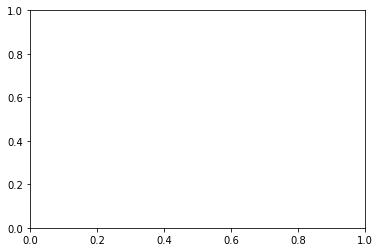

In [ ]:
import matplotlib.pyplot as plt
plt.barh(range(13), imp) # (x, y) # 중요도 (y에 얼마나 영향을 미치는지)
plt.yticks(range(13), colnames) # 축 이름

# 4.저장

In [ ]:
submission['count']= ypred1
submission.to_csv('DT_model1.csv', index=False)
submission #46.0944

In [ ]:
submission['count']= ypred2
submission.to_csv('DT_model2.csv', index=False)
submission #46.0944

In [ ]:
submission['count']= ypred7
submission.to_csv('DT_model7.csv', index=False)
submission #45.66737

In [ ]:
submission['count']= ypred8
submission.to_csv('DT_model8.csv', index=False)
submission